# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
%matplotlib inline

# Load Data

In [2]:
df=pd.read_csv('/content/dataset.csv')

# Explore Data

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

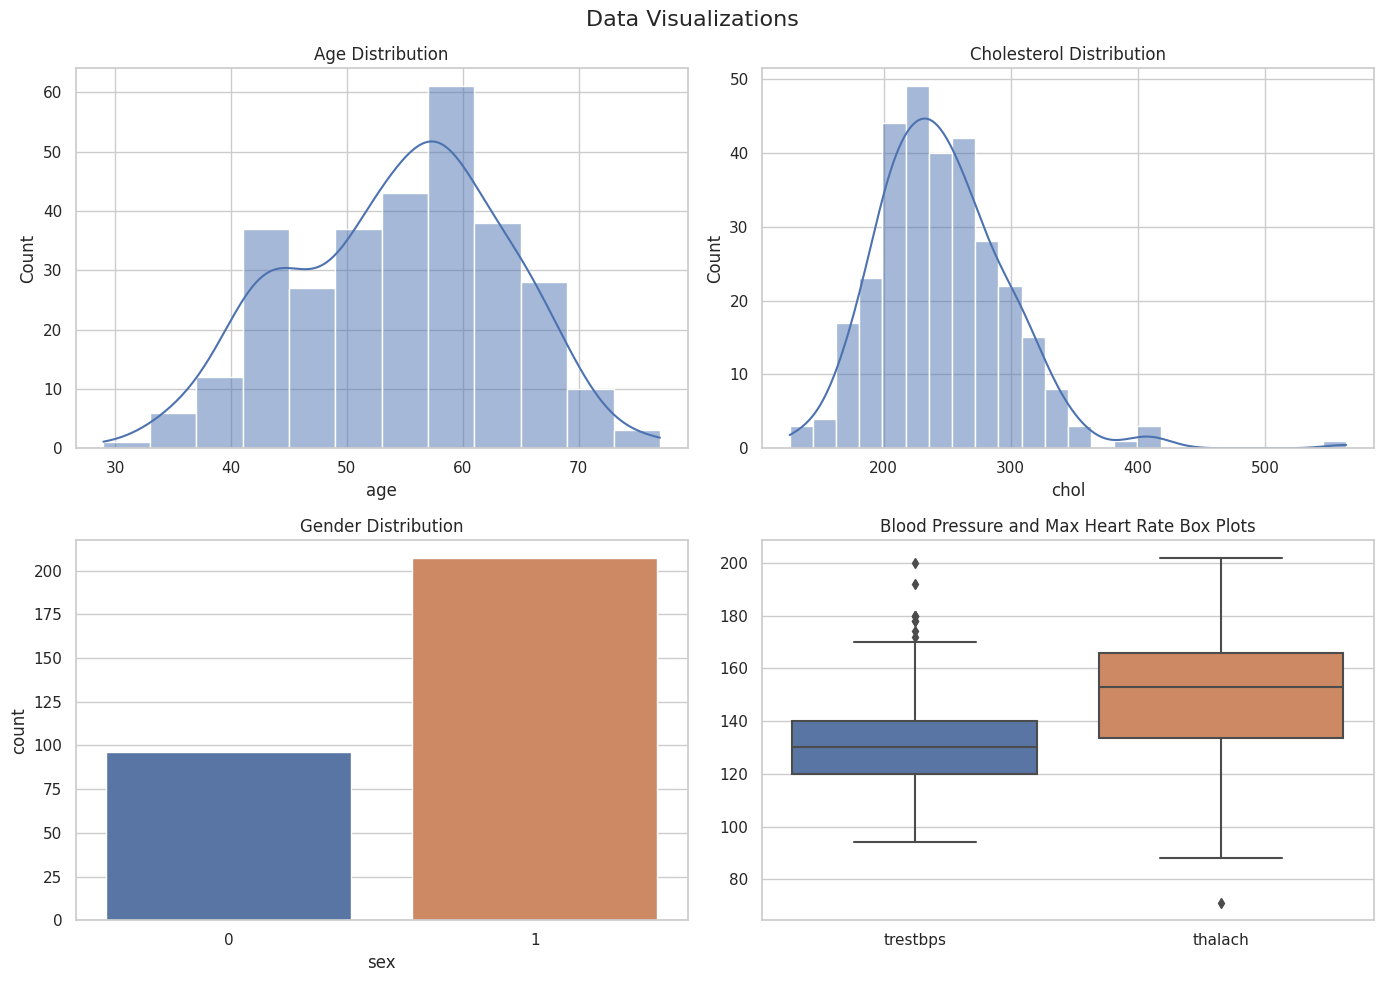

In [7]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create subplots for multiple visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# 1. Histograms for numerical features
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['chol'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Cholesterol Distribution')

# 2. Bar chart for a categorical feature (e.g., 'sex')
sns.countplot(data=df, x='sex', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

# 3. Box plot for numerical features
sns.boxplot(data=df[['trestbps', 'thalach']], ax=axes[1, 1])
axes[1, 1].set_title('Blood Pressure and Max Heart Rate Box Plots')

# Add overall title to the entire figure
fig.suptitle('Data Visualizations', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

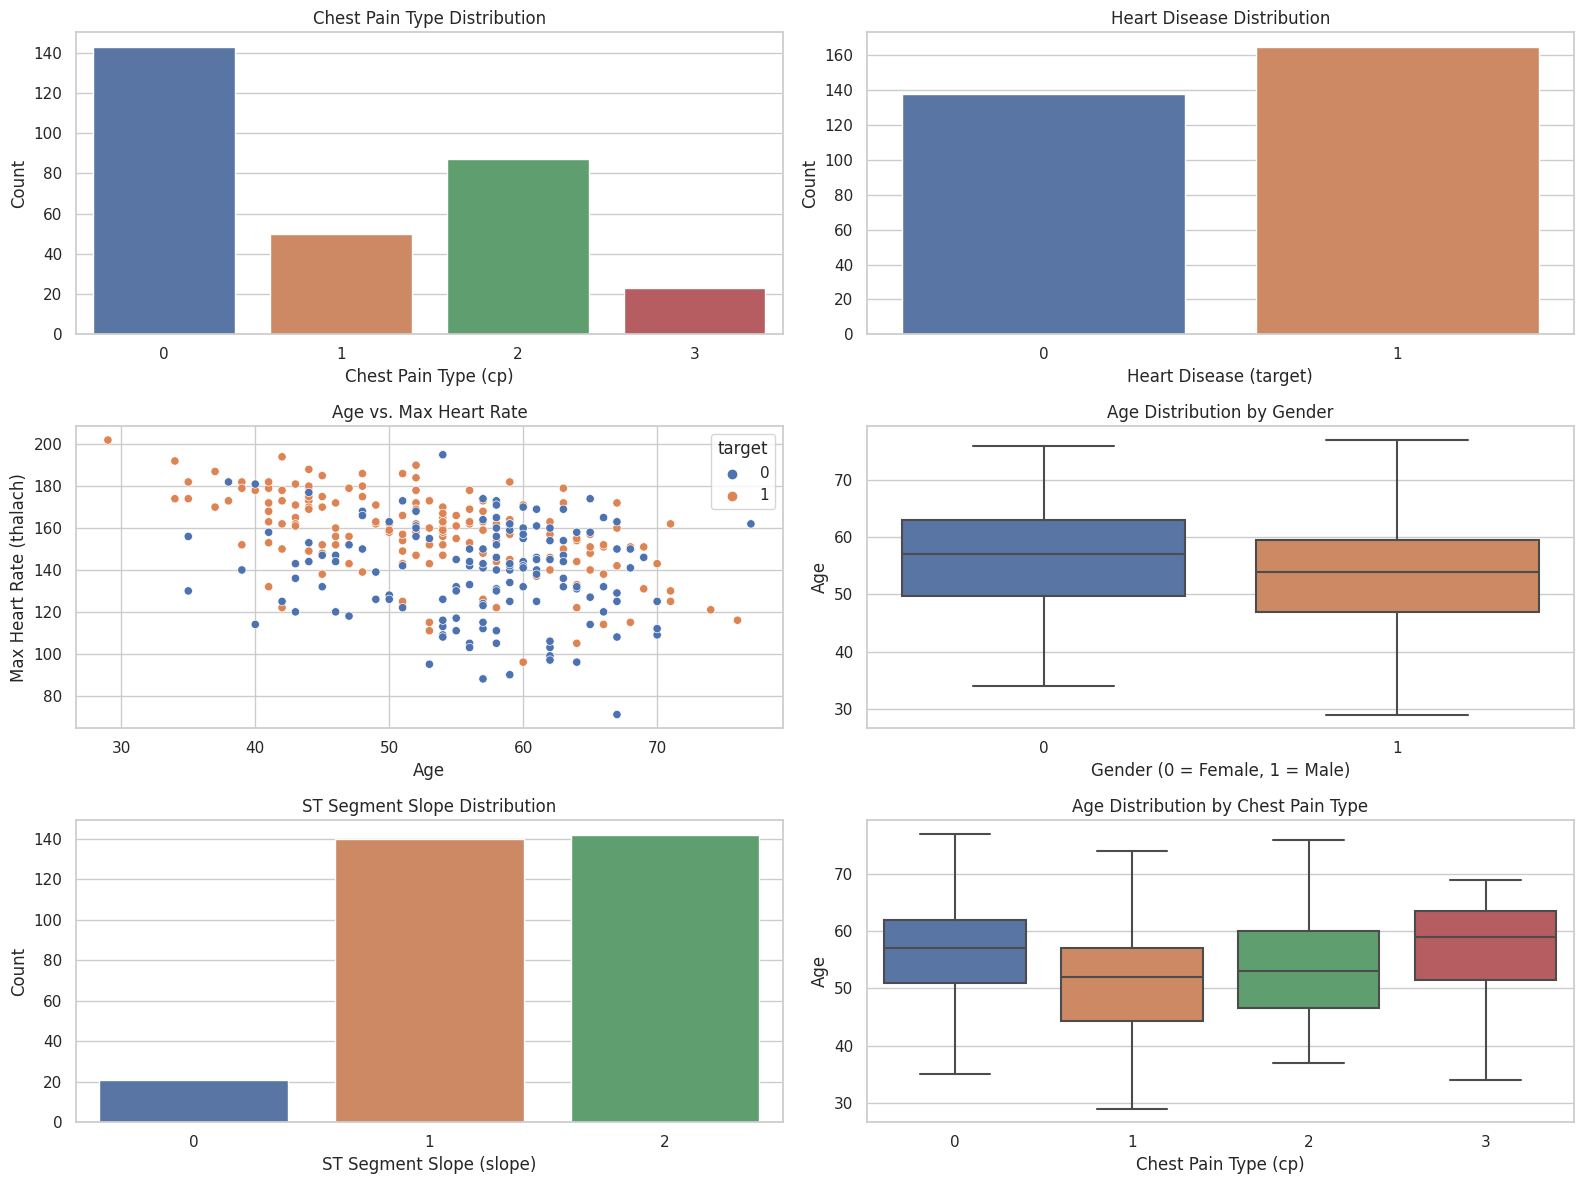

In [8]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create subplots for multiple visualizations
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

# 1. Bar chart for chest pain (cp) categories
sns.countplot(data=df, x='cp', ax=axes[0, 0])
axes[0, 0].set_title('Chest Pain Type Distribution')
axes[0, 0].set_xlabel('Chest Pain Type (cp)')
axes[0, 0].set_ylabel('Count')

# 2. Bar chart for target variable (heart disease)
sns.countplot(data=df, x='target', ax=axes[0, 1])
axes[0, 1].set_title('Heart Disease Distribution')
axes[0, 1].set_xlabel('Heart Disease (target)')
axes[0, 1].set_ylabel('Count')

# 3. Scatter plot for age vs. maximum heart rate (thalach)
sns.scatterplot(data=df, x='age', y='thalach', hue='target', ax=axes[1, 0])
axes[1, 0].set_title('Age vs. Max Heart Rate')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Max Heart Rate (thalach)')

# 4. Box plot for age vs. gender
sns.boxplot(data=df, x='sex', y='age', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Gender')
axes[1, 1].set_xlabel('Gender (0 = Female, 1 = Male)')
axes[1, 1].set_ylabel('Age')

# 5. Count plot for slope of the peak exercise ST segment
sns.countplot(data=df, x='slope', ax=axes[2, 0])
axes[2, 0].set_title('ST Segment Slope Distribution')
axes[2, 0].set_xlabel('ST Segment Slope (slope)')
axes[2, 0].set_ylabel('Count')

# 6. Box plot for age vs. chest pain type (cp)
sns.boxplot(data=df, x='cp', y='age', ax=axes[2, 1])
axes[2, 1].set_title('Age Distribution by Chest Pain Type')
axes[2, 1].set_xlabel('Chest Pain Type (cp)')
axes[2, 1].set_ylabel('Age')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Putting Feature Variable to X and Target variable to y

In [9]:
X = df.drop('target',axis=1)
# Putting response variable to y
y = df['target']

# Train-Test-Split

In [10]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [11]:
X_train.shape, X_test.shape

((212, 13), (91, 13))

# RandomForestClassifier

In [12]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [13]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 358 ms, sys: 15.9 ms, total: 374 ms
Wall time: 483 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [14]:
classifier_rf.score(X_train, y_train)

0.9575471698113207

In [15]:
y_pred=classifier_rf.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test data: {accuracy:.2f}")

Accuracy on the test data: 0.84


# Hyperparameter Tuning

In [17]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [18]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [19]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 3.11 s, sys: 312 ms, total: 3.43 s
Wall time: 1min 54s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [20]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [21]:
b_score=grid_search.best_score_
b_score

0.8349056603773585

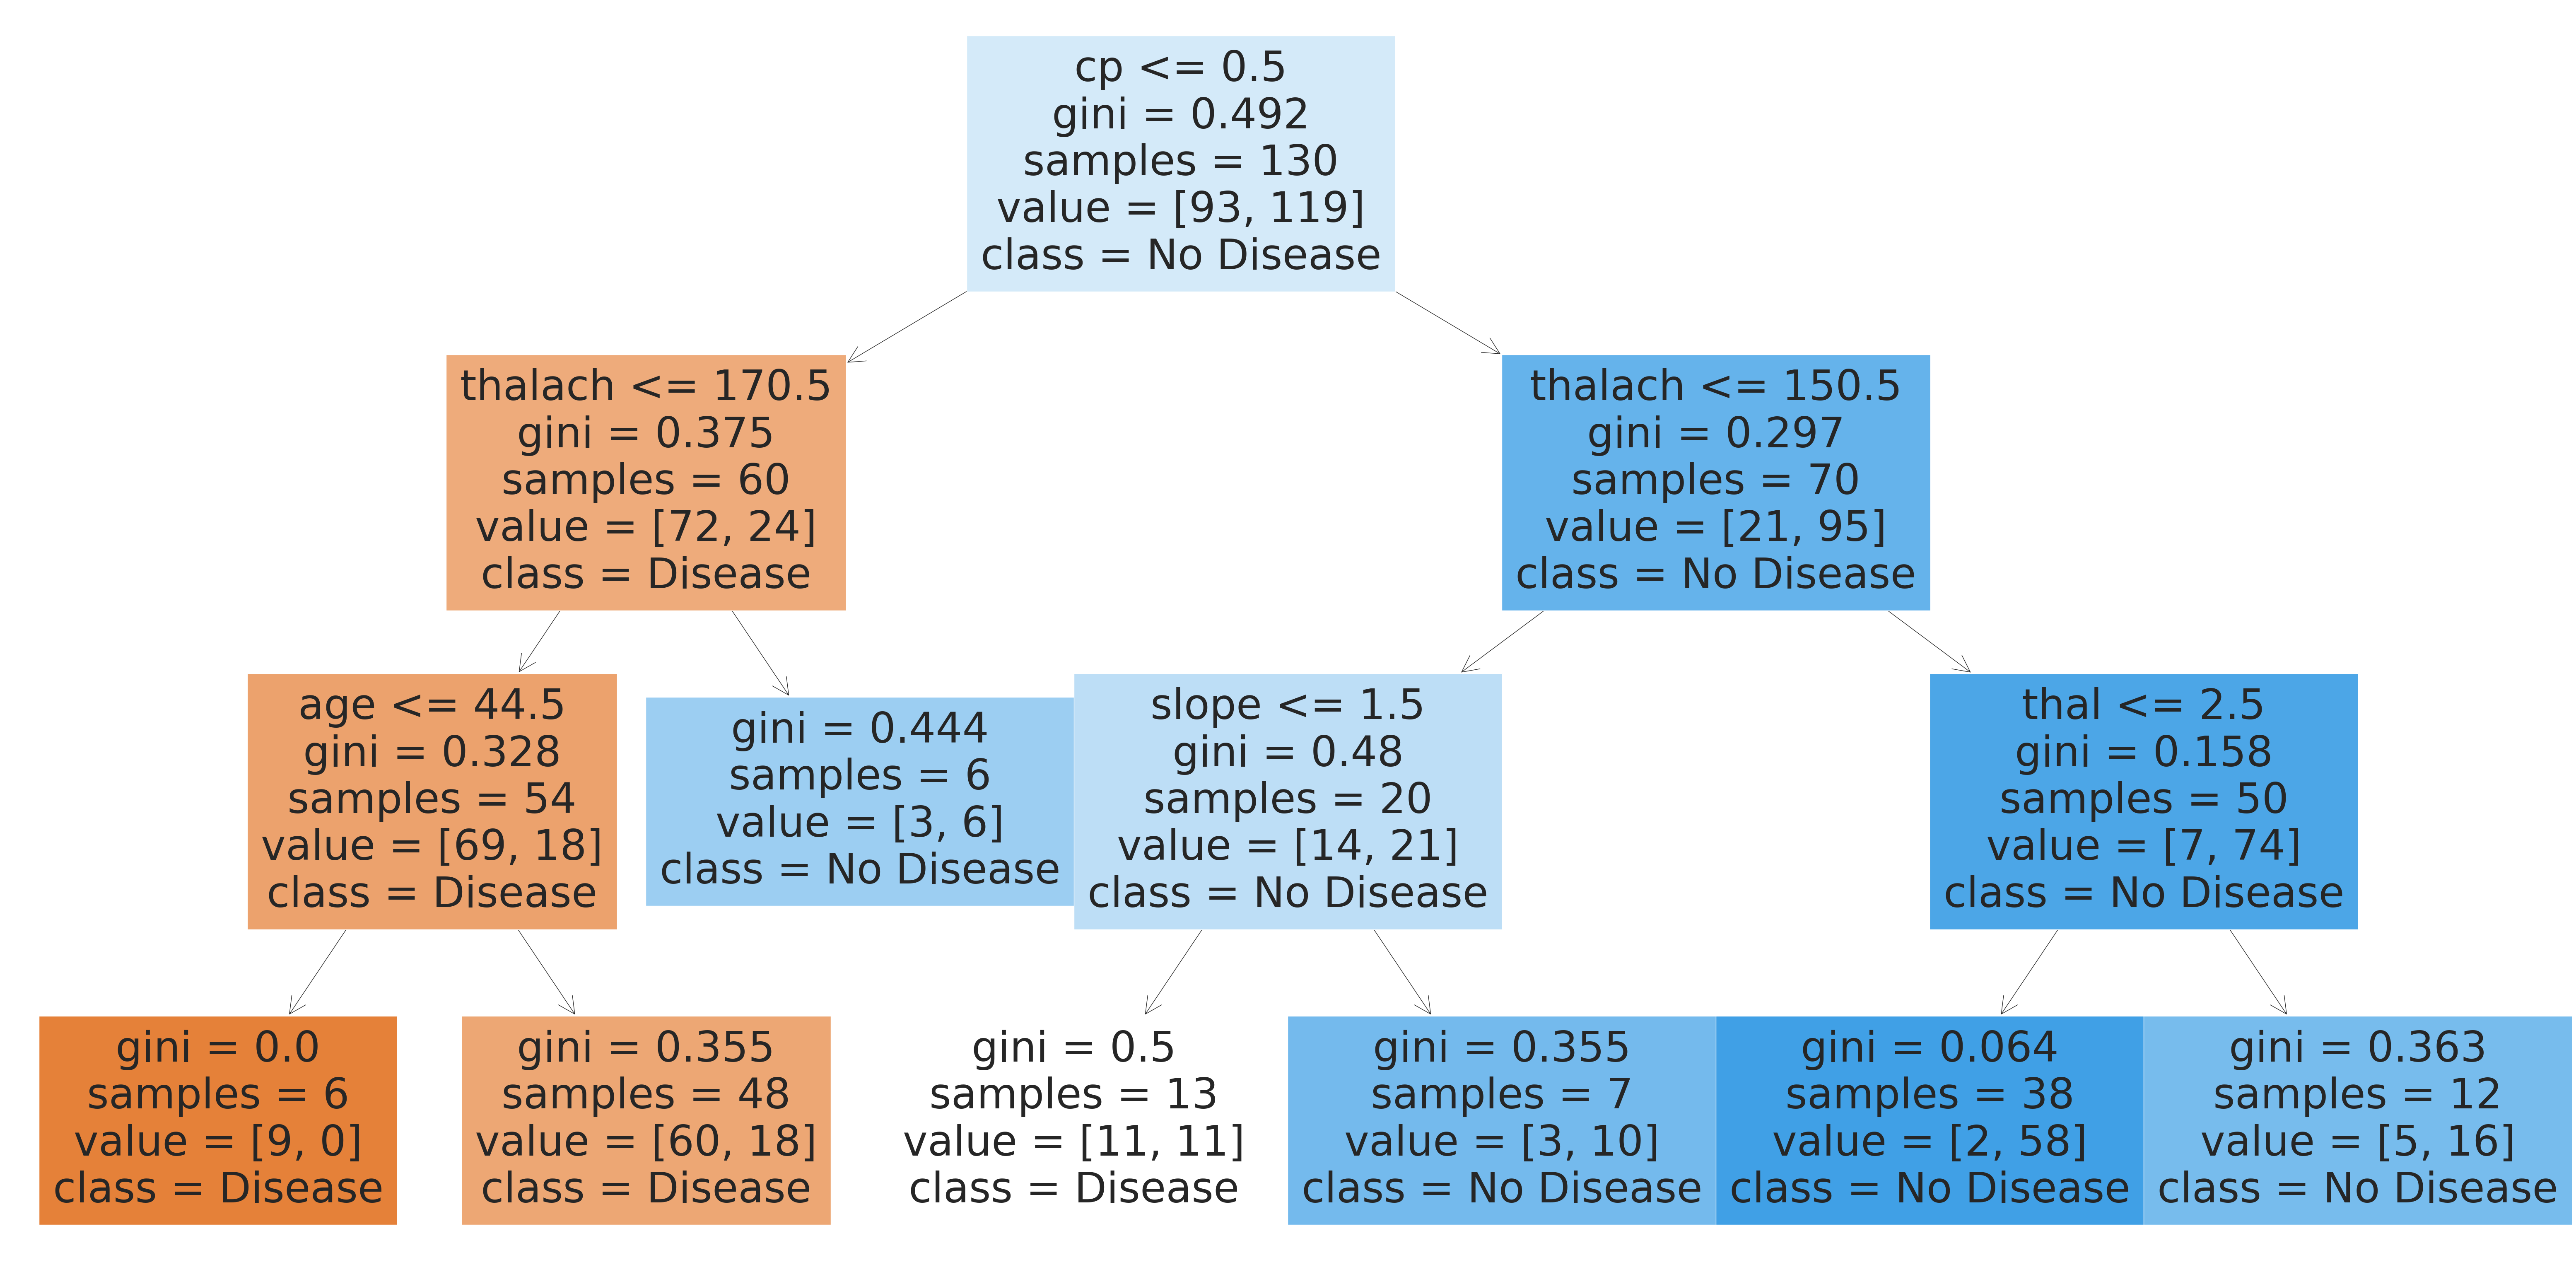

In [22]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [23]:
rf_best.feature_importances_

array([0.02710122, 0.04878956, 0.18393793, 0.02133891, 0.01571649,
       0.0013147 , 0.00243355, 0.12137129, 0.14267091, 0.1006341 ,
       0.04693598, 0.16628463, 0.12147071])

In [24]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
2,cp,0.183938
11,ca,0.166285
8,exang,0.142671
12,thal,0.121471
7,thalach,0.121371
9,oldpeak,0.100634
1,sex,0.048790
10,slope,0.046936
0,age,0.027101
3,trestbps,0.021339


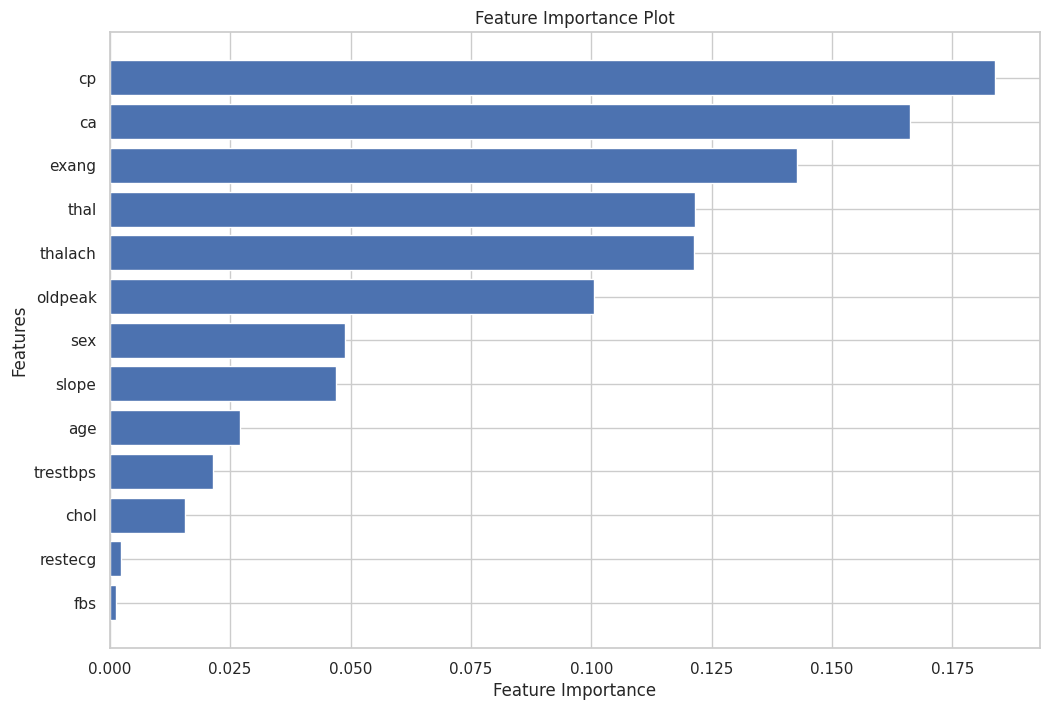

In [25]:
# Assuming you already have the 'imp_df' DataFrame with feature importances
imp_df_sorted = imp_df.sort_values(by="Imp", ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(imp_df_sorted["Varname"], imp_df_sorted["Imp"])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()
